In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
path = "http://bit.ly/w-data"
df  = pd.read_csv(path)

In [32]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [33]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [34]:
df.shape

(25, 2)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


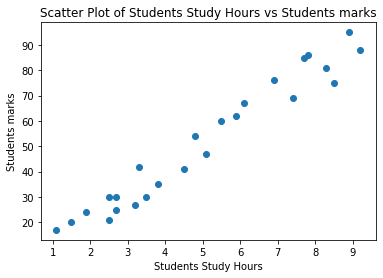

In [37]:
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [38]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [39]:
X = df.drop("Scores", axis = "columns")
y = df.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
# print("shape of X_train = ", X_train.shape)
# print("shape of y_train = ", y_train.shape)
# print("shape of X_test = ", X_test.shape)
# print("shape of y_test = ", y_test.shape)

In [64]:
 # y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression( n_jobs=1)

In [65]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
lr.coef_

array([[9.56433743]])

In [67]:
lr.intercept_

array([2.70197068])

In [68]:
y  = lr.coef_ * 4 + lr.intercept_
y

array([[40.95932042]])

In [69]:
lr.predict([[4]])[0][0].round(2) #Predict score if studied for 4 hours and round of the result to 2 decimals

40.96

In [70]:
y_pred  = lr.predict(X_test)
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Study_hours", "Actual_Student_Marks","Predicted_Student_Marks"])

,Study_hours,Actual_Student_Marks,Predicted_Student_Marks
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [71]:
lr.score(X_test,y_test)

0.9238518102278777

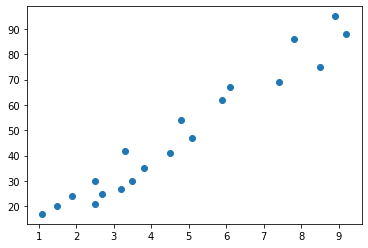

In [72]:
plt.scatter(X_train,y_train)

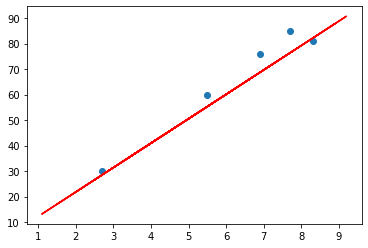

In [73]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [74]:
import joblib
joblib.dump(lr, "student_marks_predictor.pkl")

['student_marks_predictor.pkl']

In [76]:
model = joblib.load("student_marks_predictor.pkl")

In [79]:
model.predict([[10]])[0][0]

98.34534503056005

In [80]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.6422390298182545
